In [47]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_data_df=pd.read_csv(mouse_drug_data_to_load)
Drug_data_df=pd.read_csv(clinical_trial_data_to_load)

# Combine thMouse_data_dfe data into a single dataset
data_frame=[Mouse_data_df,Drug_data_df]
combine_data_df=pd.merge(Drug_data_df, Mouse_data_df, how='left',on=['Mouse ID','Mouse ID'])

# Display the data table for preview
combine_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [25]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_volume_mean= combine_data_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
Tumor_volume_mean=pd.DataFrame(Tumor_volume_mean)
Tumor_volume_mean=Tumor_volume_mean.reset_index()
# Preview DataFrame
Tumor_volume_mean.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

Tumor_volume_StdError= combine_data_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
Tumor_volume_StdError_df=pd.DataFrame(Tumor_volume_StdError)
Tumor_volume_StdError_df=Tumor_volume_StdError_df.reset_index()

# Preview DataFrame
Tumor_volume_StdError_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
    

In [11]:
Tumor_volume_mean= Tumor_volume_mean.reset_index()
Tumor_pivot_vol_df= Tumor_volume_mean.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

Tumor_volume_StdError_df = Tumor_volume_StdError_df.reset_index()
Tumor_pivot_volErr_df = Tumor_volume_StdError_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

Tumor_pivot_vol_df.head()
# Tumor_pivot_volErr_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


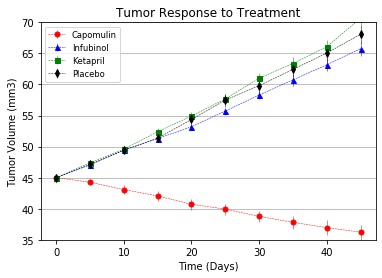

In [12]:
# Generate the Plot (with Error Bars)
# matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)


# Save the Figure
plt.ylim(35, 70)
plt.errorbar(Tumor_pivot_vol_df.index,Tumor_pivot_vol_df["Capomulin"],yerr=Tumor_pivot_volErr_df['Capomulin'],
color="r",marker="o",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)
plt.errorbar(Tumor_pivot_vol_df.index,Tumor_pivot_vol_df["Infubinol"],yerr=Tumor_pivot_volErr_df['Infubinol'],
color="b",marker="^",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)
plt.errorbar(Tumor_pivot_vol_df.index,Tumor_pivot_vol_df["Ketapril"],yerr=Tumor_pivot_volErr_df['Ketapril'],
color="g",marker="s",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)
plt.errorbar(Tumor_pivot_vol_df.index,Tumor_pivot_vol_df["Placebo"],yerr=Tumor_pivot_volErr_df['Placebo'],
color="k",marker="d",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Fig1.png")


In [13]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_SiteData_mean= combine_data_df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame
Met_SiteData_mean_df=pd.DataFrame(Met_SiteData_mean)
# Preview DataFrame
Met_SiteData_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Met_SiteData_StdErr=combine_data_df.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
Met_SiteData_StdErr_df=pd.DataFrame(Met_SiteData_StdErr)
# Preview DataFrame
Met_SiteData_StdErr_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [16]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

# Tumor_pivot_volErr_df.head()

In [17]:
Met_SiteData_mean_df=Met_SiteData_mean.reset_index()
Met_SiteData_mean_pivot=Met_SiteData_mean_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

Met_SiteData_StdErr_df=Met_SiteData_StdErr_df.reset_index()
Met_SiteData_StdErr_pivot=Met_SiteData_StdErr_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
Met_SiteData_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


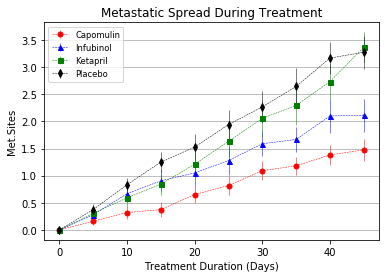

In [18]:
# Generate the Plot (with Error Bars)


plt.errorbar(Met_SiteData_mean_pivot.index,Met_SiteData_mean_pivot['Capomulin'], yerr=Met_SiteData_StdErr_pivot['Capomulin'],
color="r",marker="o",markersize=5,xuplims=True, linestyle='dashed', linewidth=0.50)
plt.errorbar(Met_SiteData_mean_pivot.index,Met_SiteData_mean_pivot['Infubinol'],yerr=Met_SiteData_StdErr_pivot['Infubinol'],
color="b",marker="^",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)
plt.errorbar(Met_SiteData_mean_pivot.index,Met_SiteData_mean_pivot['Ketapril'],yerr=Met_SiteData_StdErr_pivot['Ketapril'],
color="g",marker="s",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)
plt.errorbar(Met_SiteData_mean_pivot.index,Met_SiteData_mean_pivot['Placebo'],yerr=Met_SiteData_StdErr_pivot['Placebo'],
color="k",marker="d",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)

plt.title('Metastatic Spread During Treatment')
plt.ylabel('Met.Sites')
plt.xlabel('Treatment Duration (Days)')
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Fig2.png")


# Show the Figure
plt.show()

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [20]:
Mice_count= combine_data_df.groupby(['Drug','Timepoint']).count()['Mouse ID']
Mice_count=pd.DataFrame(Mice_count)
Mice_count.head().reset_index()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [22]:
Mice_count=Mice_count.reset_index()
Mice_count_pivot=Mice_count.pivot(index='Timepoint', columns='Drug')['Mouse ID']
Mice_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [23]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

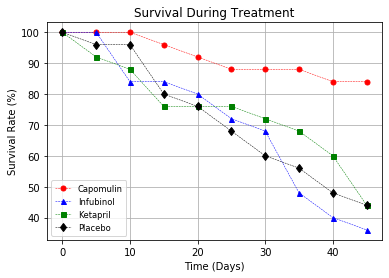

In [41]:
plt.plot(100 * Mice_count_pivot['Capomulin'] / 25 , "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * Mice_count_pivot['Infubinol'] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * Mice_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * Mice_count_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Fig3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [42]:
drug_percentage_change =  100 * (Tumor_pivot_vol_df.iloc[-1] - Tumor_pivot_vol_df.iloc[0]) / Tumor_pivot_vol_df.iloc[0]

drug_percentage_change
# Summary_bar_mean

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

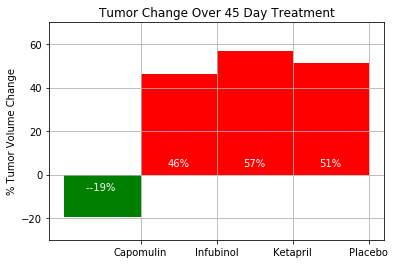

In [49]:
# Store all Relevant Percent Changes into a Tuple
Summary_percent_change = (
    drug_percentage_change ["Capomulin"], 
    drug_percentage_change ["Infubinol"], 
    drug_percentage_change ["Ketapril"], 
    drug_percentage_change ["Placebo"])


# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(Summary_percent_change))  
width = 1
drug_pass = ax.bar(ind[0], Summary_percent_change[0], width, color='green')
drug_fail = ax.bar(ind[1:], Summary_percent_change[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes

def autolabelFail(drug_pass):
    for drug in drug_pass:
        height = drug.get_height()
        ax.text(drug.get_x() + drug.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(drug_fail):
    for drug in drug_fail:
        height = drug.get_height()
        ax.text(drug.get_x() + drug.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
# Call functions to implement the function calls
autolabelPass(drug_pass)
autolabelFail(drug_fail)



# Save the Figure
fig.savefig("analysis/Fig4.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)